In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()  
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets list -s "vehicle classification"  

ref                                                           title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
marquis03/vehicle-classification                              Vehicle Classification                             958047015  2023-11-04 09:27:11.360000           2109         35  1.0              
mohamedmaher5/vehicle-classification                          Vehicle Image Classification                       866783573  2024-08-09 18:35:57.433000           4316         47  0.875            
gauravduttakiit/vehicle-insurance-fraud-classification        Vehicle Insurance Fraud Classification            1516273457  2024-02-04 08:09:44.960000            331         10  0.8125           
doaaalsenani/usa-cer

In [ ]:

!kaggle datasets download -d mohamedhaher5/vehicle-classification

!unzip -q vehicle-classification.zip -d /content/dataset

403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/mohamedhaher5/vehicle-classification
unzip:  cannot find or open vehicle-classification.zip, vehicle-classification.zip.zip or vehicle-classification.zip.ZIP.


In [7]:
!unzip "/content/archive (1).zip" -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (630).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (631).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (632).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (633).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (634).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (635).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (636).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (637).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (638).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (639).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (64).jpg  
  inflating: /content/dataset/Vehicles/Auto Rickshaws/Auto Rickshaw (6

In [12]:
print(f"Number of classes detected: {train_generator.num_classes}")
print(f"Class names: {train_generator.class_indices}")

Number of classes detected: 7
Class names: {'Auto Rickshaws': 0, 'Bikes': 1, 'Cars': 2, 'Motorcycles': 3, 'Planes': 4, 'Ships': 5, 'Trains': 6}


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:

#  Load VGG16 (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze layers initially

In [ ]:
#  Build custom model
model = Sequential([
    base_model,
    Flatten(),  # VGG16 uses Flatten instead of GlobalAveragePooling
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


In [ ]:

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=15
)

In [ ]:
# Fine-tuning
base_model.trainable = True
for layer in base_model.layers[:15]:  # Unfreeze last few layers
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=1e-6), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_fine = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=5
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 139s 893ms/step - accuracy: 0.2766 - loss: 6.8267 - val_accuracy: 0.7986 - val_loss: 5.6495
Epoch 2/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 109s 744ms/step - accuracy: 0.6727 - loss: 5.5991 - val_accuracy: 0.8496 - val_loss: 4.9835
Epoch 3/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 141s 740ms/step - accuracy: 0.7602 - loss: 5.0105 - val_accuracy: 0.8720 - val_loss: 4.5848
Epoch 4/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 104s 741ms/step - accuracy: 0.7981 - loss: 4.6294 - val_accuracy: 0.8774 - val_loss: 4.2727
Epoch 5/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 143s 745ms/step - accuracy: 0.8269 - loss: 4.2875 - val_accuracy: 0.8863 - val_loss: 4.0211
Epoch 6/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 142s 747ms/step - accuracy: 0.8492 - loss: 4.0364 - val_accuracy: 0.8899 - val_loss: 3.7830
Epoch 7/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 103s 739ms/step - accuracy: 0.8576 - loss: 3.8115 - val_accuracy: 0.9167 - val_loss: 3.5695
Epoch 8/15
140/140 ━━━━━━

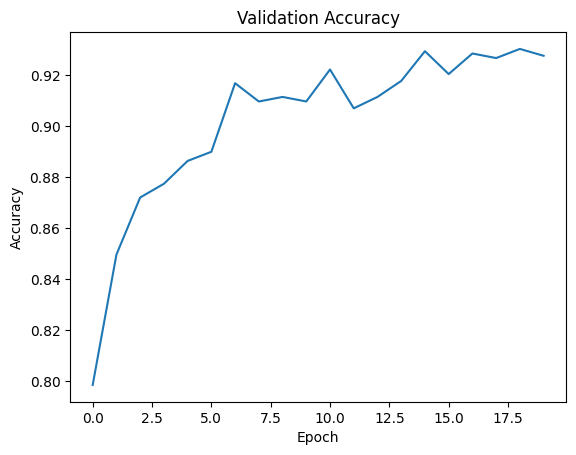

In [ ]:
# Visualize results
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Saving Train (72).jpg to Train (72) (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


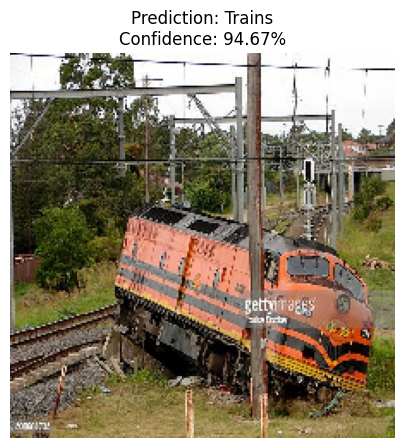

'Trains'

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def predict_and_show(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0  # Normalize

    # Predict
    pred = model.predict(x)
    class_idx = np.argmax(pred)
    confidence = np.max(pred) * 100
    predicted_class = list(train_generator.class_indices.keys())[class_idx]

    # Display image with prediction
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%", fontsize=12)
    plt.axis('off')
    plt.show()

    return predicted_class

# Upload and predict
uploaded = files.upload()
img_path = next(iter(uploaded))
predict_and_show(img_path)